# WeatherPy
----

#### Analysis
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import json
import random
import numpy as np
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy


## Generate Cities List

In [2]:
lat_lngl=[]
citiesl=[]

In [3]:
latr=np.random.uniform(-90.00, 90.00, size =1500)
# latr

In [4]:
lngr=np.random.uniform(-180.00, 180.00, size =1500)
# lngr

In [5]:
# lat_lngl=(latr,lngr)
# list_latlng=next(zip(latr,lngr))
# list_latlng=zip(latr,lngr)
list_latlng=list(zip(latr,lngr))
# print(list_latlng)
# list_latlng[0]

In [6]:
for lat_and_lng in list_latlng:
    city = citipy.nearest_city(lat_and_lng[0],lat_and_lng[1])
    city_name=city.city_name
    if city_name not in citiesl:
        citiesl.append(city_name)
# print(citiesl)
# len(citiesl)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# "api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
# api.openweathermap.org/data/2.5/find?q=London&units=imperial

In [ ]:
# query_url = f"{url}appid={weather_api_key}&units={units}"

In [ ]:
# weather_response=requests.get(query_url)

In [ ]:
# weather_json=weather_response.json()

In [ ]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# # weather_response=requests.get(query_url+citiesl).json()
# weather_response=requests.get(query_url+city_name).json()
# print(json.dumps(weather_response, indent=4,sort_keys=True))


In [8]:
City=[]
Lat=[]
Lng=[]
Max_Temp=[] 
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

In [9]:
units="imperial"

In [ ]:
# print("Beginning Data Retrieval")     
# print("-----------------------------")

In [10]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# weather_response=requests.get(query_url)

In [11]:
for city_name in citiesl:
    weather_response=requests.get(query_url+city_name).json()
    try:
#         query_url = f"{url}appid={weather_api_key}&units={units}"
#         weather_response=requests.get(query_url)
#         weather_response=requests.get(query_url+city_name).json()
        City.append(weather_response['name'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Humidity.append(weather_response['main']['humidity'])
        Cloudiness.append(weather_response['clouds']['all'])
        Wind_Speed.append(weather_response['wind']['speed'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        print(f"Processing Record 1 of Set 1 | {city_name}")    
        
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Processing Record 1 of Set 1 | freeport
Processing Record 1 of Set 1 | faanui
Processing Record 1 of Set 1 | tasiilaq
Processing Record 1 of Set 1 | hermanus
Processing Record 1 of Set 1 | punta arenas
Processing Record 1 of Set 1 | albany
Processing Record 1 of Set 1 | hobart
Processing Record 1 of Set 1 | castro
Processing Record 1 of Set 1 | san cristobal
Processing Record 1 of Set 1 | sibi
Processing Record 1 of Set 1 | ruteng
Processing Record 1 of Set 1 | mataura
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 1 of Set 1 | jamestown
City not found. Skipping...
Processing Record 1 of Set 1 | carnarvon
Processing Record 1 of Set 1 | ocosingo
Processing Record 1 of Set 1 | torbay
City not found. Skipping...
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | maldonado
Processing Record 1 of Set 1 | ust-tsilma
City not found. Skipping...
Processing Record 1 of Set 1 | port alfred
Processing Record 1 of Set 1 | chokurdakh
Processing Record 1 of Set 1

Processing Record 1 of Set 1 | general roca
Processing Record 1 of Set 1 | bahia blanca
Processing Record 1 of Set 1 | norsup
Processing Record 1 of Set 1 | antofagasta
Processing Record 1 of Set 1 | fortuna
Processing Record 1 of Set 1 | monsenhor gil
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 1 of Set 1 | saryg-sep
Processing Record 1 of Set 1 | ruyigi
Processing Record 1 of Set 1 | yenagoa
Processing Record 1 of Set 1 | brigantine
Processing Record 1 of Set 1 | firovo
Processing Record 1 of Set 1 | tahoua
Processing Record 1 of Set 1 | samarai
Processing Record 1 of Set 1 | staraya mayna
Processing Record 1 of Set 1 | luderitz
Processing Record 1 of Set 1 | cherskiy
Processing Record 1 of Set 1 | bengkulu
Processing Record 1 of Set 1 | grindavik
Processing Record 1 of Set 1 | alofi
Processing Record 1 of Set 1 | ginda
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 1 of Set 1 | lompoc
Processing Record 1 of Set 1 | coihaique
Processing Reco

Processing Record 1 of Set 1 | kenai
Processing Record 1 of Set 1 | batsfjord
Processing Record 1 of Set 1 | padang
Processing Record 1 of Set 1 | liverpool
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 1 of Set 1 | saskylakh
Processing Record 1 of Set 1 | henties bay
Processing Record 1 of Set 1 | tuatapere
Processing Record 1 of Set 1 | nong bua
Processing Record 1 of Set 1 | ahuimanu
Processing Record 1 of Set 1 | nizhniy kislyay
Processing Record 1 of Set 1 | sola
Processing Record 1 of Set 1 | yate
Processing Record 1 of Set 1 | conceicao do araguaia
Processing Record 1 of Set 1 | meadow lake
Processing Record 1 of Set 1 | bosaso
City not found. Skipping...
Processing Record 1 of Set 1 | vianden
Processing Record 1 of Set 1 | tautira
Processing Record 1 of Set 1 | plast
Processing Record 1 of Set 1 | praia
City not found. Skipping...
Processing Record 1 of Set 1 | the valley
Processing Record 1 of Set 1 | san onofre
Processing Record 1 of Set 1 | matagami
Process

In [ ]:
# print(f"The latitude information received is: {Lat}")

In [ ]:
# print(f"The longitude information received is: {Lng}")

In [ ]:
# print(f"The maximum temperature is: {Max_Temp}")

In [ ]:
# print(f"The humidty is: {Humidity}")

In [ ]:
# print(f"The cloudiness is: {Cloudiness}")

In [ ]:
# print(f"The wind speed is: {Wind_Speed}")

In [ ]:
# print(f"The counry is: {Country}")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data={'City': City,
'Latitude':Lat,
'Longitude':Lng,
'Max Temp': Max_Temp,
'Humidity': Humidity,
'Cloudiness': Cloudiness,
'Wind_Speed': Wind_Speed,
'Country': Country,
'Date': Date}

In [ ]:
# print(len(City), len(Lat), len(Lng), len(Max_Temp), len(Humidity), len(Cloudiness), len(Wind_Speed), len(Country), len(Date))

In [13]:
df=pd.DataFrame(weather_data)


In [14]:
df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Freeport,40.66,-73.58,70.00,83,1,10.29,US,1601344686
1,Faanui,-16.48,-151.75,77.76,81,2,19.33,PF,1601344746
2,Tasiilaq,65.61,-37.64,30.20,100,98,1.12,GL,1601344746
3,Hermanus,-34.42,19.23,46.99,94,38,7.34,ZA,1601344747
4,Punta Arenas,-53.15,-70.92,32.00,90,20,10.29,CL,1601344730
...,...,...,...,...,...,...,...,...,...
543,Narón,43.52,-8.15,51.80,93,82,2.24,ES,1601344957
544,Dunedin,-45.87,170.50,43.00,63,100,5.99,NZ,1601344957
545,Palu,-0.89,119.87,88.34,57,81,1.70,ID,1601344958
546,Igarka,67.47,86.58,30.97,94,14,9.31,RU,1601344958


In [15]:
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.643394,19.287737,63.992573,73.187956,51.985401,7.745748,1.601345e+09
std,33.410574,90.447734,16.384615,19.791031,39.465299,5.055584,8.984974e+01
min,-54.800000,-179.170000,12.580000,9.000000,0.000000,0.130000,1.601344e+09
25%,-6.872500,-56.502500,51.800000,62.000000,9.000000,3.685000,1.601345e+09
50%,22.265000,20.150000,67.085000,78.000000,52.000000,6.845000,1.601345e+09
75%,46.560000,102.815000,77.700000,88.000000,91.000000,10.290000,1.601345e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,25.340000,1.601345e+09


In [ ]:
# s1=pd.Series(City, name="City")
# s2=pd.Series(Lat, name="Latitude")
# s3=pd.Series(Lng, name="Longitude")
# s4=pd.Series(Max_Temp, name="Max Temp")
# s5=pd.Series(Humidity, name="Humidity")
# s6=pd.Series(Cloudiness, name="Cloudiness")
# s7=pd.Series(Wind_Speed, name="Wind Speed")
# s8=pd.Series(Country, name="Country")
# s9=pd.Series(Date, name="Date")
# df = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9], axis=1)
# df

In [ ]:
# df = df.dropna(how='any')
# df

In [16]:
df.to_csv("WeatherPy.csv")

In [ ]:
# l1 = list('abc')
# l2 = [1,2,3,4]
# s1 = pd.Series(l1, name='list1')
# s2 = pd.Series(l2, name='list2')
# df = pd.concat([s1,s2], axis=1)
# df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# already did the summary stat frame and there are no cities with humidty with greater than 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

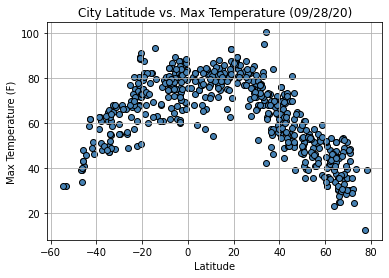

In [29]:
lati=df['Latitude']
maxtemp=df['Max Temp']
plt.scatter(lati, maxtemp, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Max Temperature (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("City Lat vs Wind Speed.png")


## Latitude vs. Humidity Plot

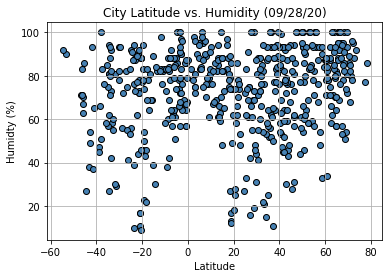

In [30]:
lati=df['Latitude']
hum=df['Humidity']
plt.scatter(lati, hum, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Humidity (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.grid()
plt.savefig("City Lat vs Humidity.png")

## Latitude vs. Cloudiness Plot

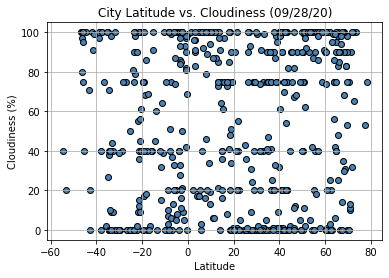

In [32]:
lati=df['Latitude']
cl=df['Cloudiness']
plt.scatter(lati, cl, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Cloudiness (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("City Lat vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

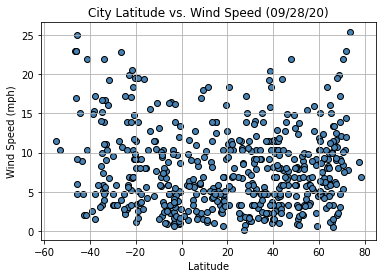

In [34]:
lati=df['Latitude']
ws=df['Wind_Speed']
plt.scatter(lati, ws, edgecolors="black",facecolors="steelblue")
plt.title('City Latitude vs. Wind Speed (09/28/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("City Lat vs Wind Speed.png")

## Linear Regression

In [38]:
north=df.loc[df['Latitude']>=0,:]
north

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Freeport,40.66,-73.58,70.00,83,1,10.29,US,1601344686
2,Tasiilaq,65.61,-37.64,30.20,100,98,1.12,GL,1601344746
5,Albany,42.60,-73.97,71.01,92,0,1.01,US,1601344702
8,San Cristobal,7.77,-72.22,66.22,89,79,2.04,VE,1601344576
9,Sibi,29.54,67.88,81.50,31,0,1.81,PK,1601344748
...,...,...,...,...,...,...,...,...,...
541,Balabac,7.99,117.06,84.45,70,100,6.17,PH,1601344956
542,Tessalit,20.20,1.01,86.59,18,0,9.37,ML,1601344928
543,Narón,43.52,-8.15,51.80,93,82,2.24,ES,1601344957
546,Igarka,67.47,86.58,30.97,94,14,9.31,RU,1601344958


In [39]:
south=df.loc[df['Latitude']<=0,:]
south

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
1,Faanui,-16.48,-151.75,77.76,81,2,19.33,PF,1601344746
3,Hermanus,-34.42,19.23,46.99,94,38,7.34,ZA,1601344747
4,Punta Arenas,-53.15,-70.92,32.00,90,20,10.29,CL,1601344730
6,Hobart,-42.88,147.33,62.01,54,20,4.70,AU,1601344591
7,Castro,-24.79,-50.01,62.91,92,0,2.26,BR,1601344747
...,...,...,...,...,...,...,...,...,...
534,Puerto Baquerizo Moreno,-0.90,-89.60,66.42,87,42,11.97,EC,1601344953
536,Marabá,-5.37,-49.12,84.20,74,5,4.70,BR,1601344954
540,Ialibu,-6.28,143.99,64.40,84,100,2.48,PG,1601344956
544,Dunedin,-45.87,170.50,43.00,63,100,5.99,NZ,1601344957


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7226117716227859


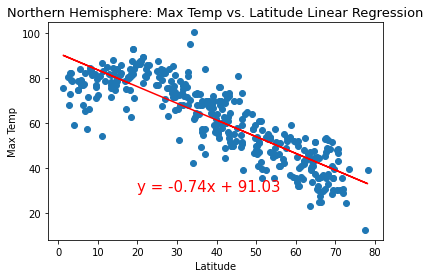

<Figure size 432x288 with 0 Axes>

In [42]:
y_values=north['Max Temp']
x_values=north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Max Temp', fontsize =10)
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Max Temp vs Lat Lnr Reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5550579618401759


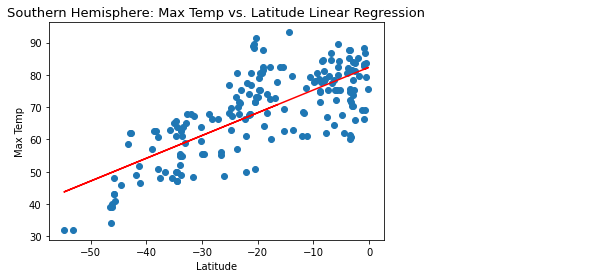

<Figure size 432x288 with 0 Axes>

In [43]:
y_values=south['Max Temp']
x_values=south['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Max Temp', fontsize =10)
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("South Max Temp vs Lat Lnr Reg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016817956748521427


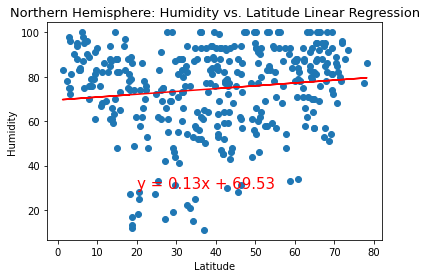

<Figure size 432x288 with 0 Axes>

In [45]:
y_values=north['Humidity']
x_values=north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Humidity', fontsize =10)
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Northern Humidity vs Lat Lnr Reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02458135640611328


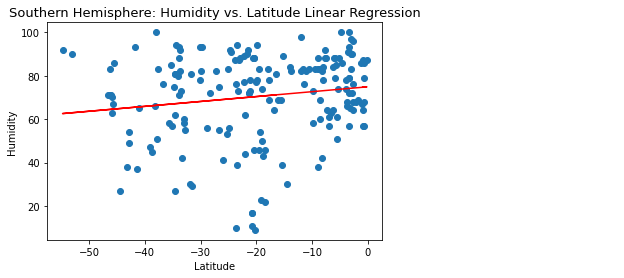

<Figure size 432x288 with 0 Axes>

In [46]:
y_values=south['Humidity']
x_values=south['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude', fontsize =10)
plt.ylabel('Humidity', fontsize =10)
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("South Humidity vs Lat Lnr Reg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression